### Perform two-way ANOVA hypothesis tests with statsmodels

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

E:\Programme\miniconda3\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_csv('data/salaries.csv')

In [3]:
data_cleaned = data.drop(data[data.salary_in_usd > 200000].index)

In [4]:
model0_cleaned = ols('salary_in_usd ~ C(remote_ratio)', data=data_cleaned).fit()
aov_table = sm.stats.anova_lm(model0_cleaned, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(remote_ratio),1.640053e+11,2.0,38.376314,4.031172e-17
Residual,4.914648e+12,2300.0,NaN,NaN


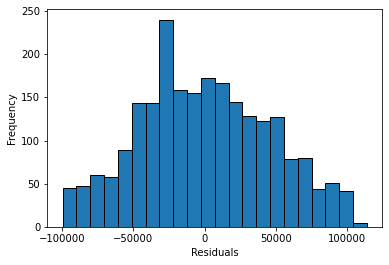

In [5]:
plt.hist(model0_cleaned.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [6]:
model0 = ols('salary_in_usd ~ C(remote_ratio)', data=data).fit()
aov_table = sm.stats.anova_lm(model0, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(remote_ratio),1.796231e+11,2.0,20.88437,1.015177e-09
Residual,1.052743e+13,2448.0,NaN,NaN


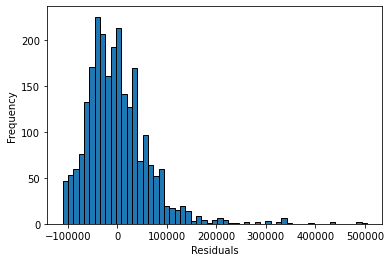

In [7]:
plt.hist(model0.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [8]:
model1 = ols('salary_in_usd ~ C(remote_ratio) + C(employee_residence)', data=data).fit()
aov_table = sm.stats.anova_lm(model1, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(remote_ratio),2.894476e+10,2.0,4.948516,7.167495e-03
C(employee_residence),3.604926e+12,81.0,15.217607,5.604333e-160
Residual,6.922504e+12,2367.0,NaN,NaN


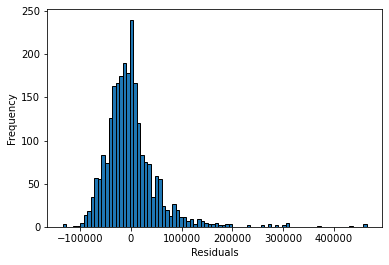

In [9]:
plt.hist(model1.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [10]:
model2 = ols('salary_in_usd ~ C(remote_ratio) + C(company_location)', data=data).fit()
aov_table = sm.stats.anova_lm(model2, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(remote_ratio),6.264463e+09,2.0,1.001624,3.674374e-01
C(company_location),3.094188e+12,71.0,13.936040,1.314224e-131
Residual,7.433241e+12,2377.0,NaN,NaN


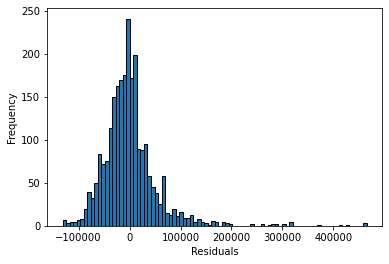

In [11]:
plt.hist(model2.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()